<h1>Franke Function</h1>

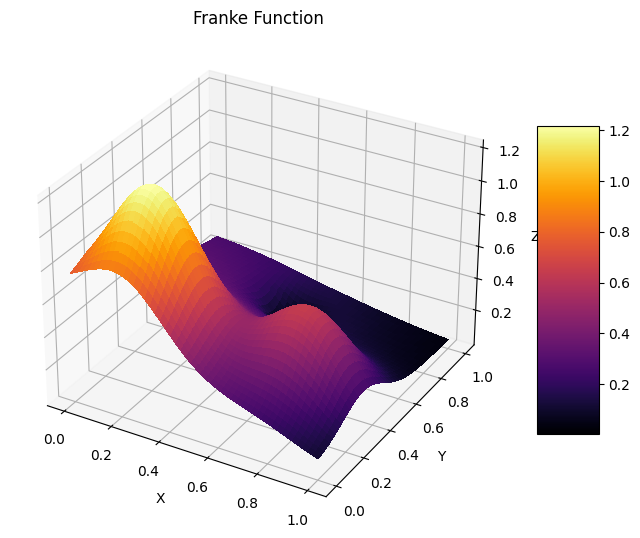

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from functions import FrankeFunction
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import warnings
warnings.filterwarnings("ignore")


n = 50
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)

xm,ym = np.meshgrid(x,y)
z = FrankeFunction(xm, ym)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
ax.set_zlim(np.min(z), np.max(z))
surf = ax.plot_surface(xm, ym, z, cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Franke Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')   
plt.show()


<h1>Apply OLS on Franke function<h1>

In [219]:
# from functions import FrankeFunction, X_design, X_scale, target_scale, OLS
import functions as fun
import importlib
importlib.reload(fun)


# Generate data.
n = 50
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xm, ym = np.meshgrid(x,y)

z = fun.FrankeFunction(xm, ym)

mse_un_test = []
mse_un_train = []
mse_sc_test = []
mse_sc_train = []
r2_un_test = []
r2_un_train = []
r2_sc_test = []
r2_sc_train = []
betas_sc = []
betas_un = []


for d in range(1, 6):
    X = fun.X_design(x, y, d)
    z_flat = z.flatten()

    #unscaled data
    z_mod, z_mod_train, z_mod_test, beta, z_train, z_test = fun.OLS(X, z_flat, random_state=42)
    betas_un.append(beta)
    mse_un_test.append(fun.MSE(z_mod_test, z_test))
    mse_un_train.append(fun.MSE(z_mod_train, z_train))
    r2_un_test.append(fun.R2(z_mod_test, z_test))
    r2_un_train.append(fun.R2(z_mod_train, z_train))

    #scaled data
    z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X, scaler_z = fun.OLS(X, z_flat, random_state=42,scaled_data=True)

    betas_sc.append(beta_sc)
    mse_sc_test.append(fun.MSE(z_mod_test_sc, z_test_sc))
    mse_sc_train.append(fun.MSE(z_mod_train_sc, z_train_sc))
    r2_sc_test.append(fun.R2(z_mod_test_sc, z_test_sc))
    r2_sc_train.append(fun.R2(z_mod_train_sc, z_train_sc))




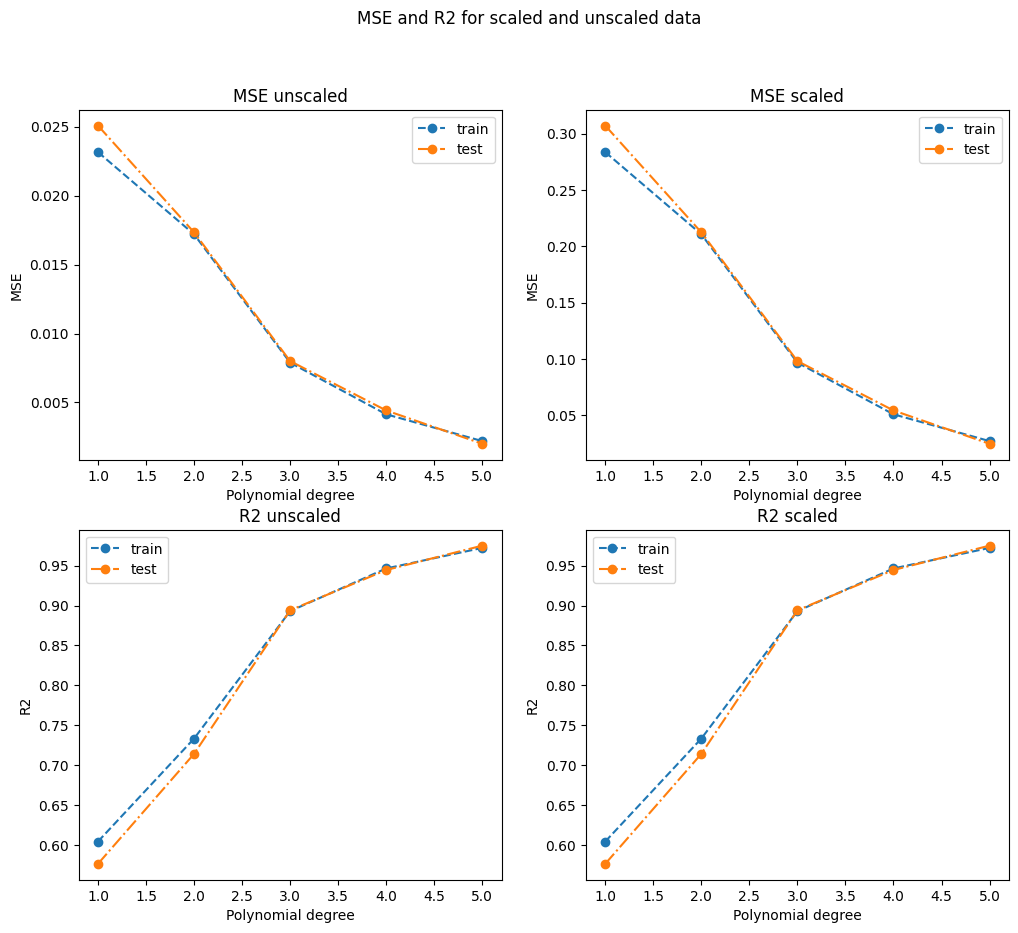

In [220]:
# Plot MSE and R2 for scaled and unscaled data

#4 subplots. Scaled and unscaled MSE and R2, for test and train

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled data')
axs[0, 0].plot(range(1, 6), mse_un_train,'--o', label='train')
axs[0, 0].plot(range(1, 6), mse_un_test,'-.o', label='test')
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()
plt.grid()


axs[0, 1].plot(range(1, 6), mse_sc_train,'--o', label='train')
axs[0, 1].plot(range(1, 6), mse_sc_test,'-.o', label='test')
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].legend()
plt.grid()


axs[1, 0].plot(range(1, 6), r2_un_train,'--o', label='train')
axs[1, 0].plot(range(1, 6), r2_un_test,'-.o', label='test')
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')   
axs[1, 0].set_ylabel('R2')
axs[1, 0].legend()
plt.grid()


axs[1, 1].plot(range(1, 6), r2_sc_train,'--o', label='train')
axs[1, 1].plot(range(1, 6), r2_sc_test,'-.o', label='test')
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('R2')
axs[1, 1].legend()

plt.grid()

plt.show()

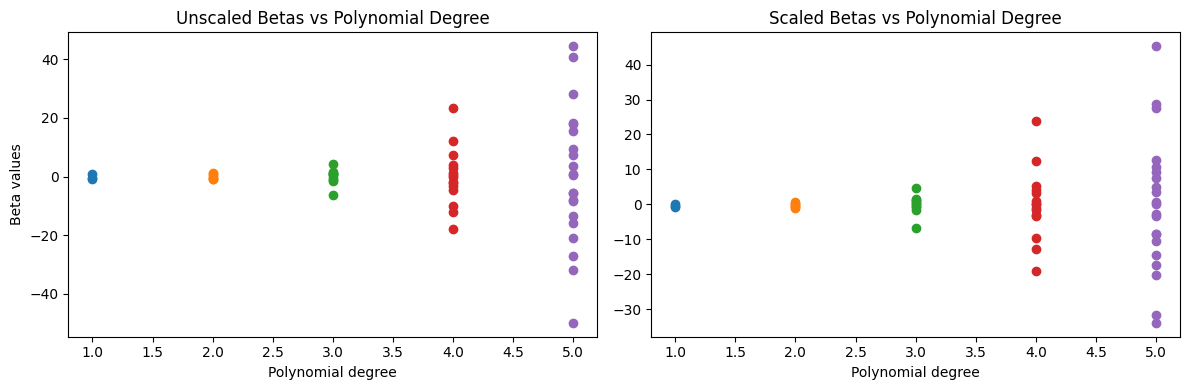

In [221]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a 2x1 grid of subplots
degrees = np.arange(1, 6)

# Plot for unscaled betas
for i, betas in enumerate(betas_un):
    axs[0].scatter([degrees[i]] * len(betas), betas, label=f'Degree {degrees[i]}')
axs[0].set_xlabel(r'Polynomial degree')
axs[0].set_ylabel(r'Beta values')
axs[0].set_title('Unscaled Betas vs Polynomial Degree')

# Plot for scaled betas
for i, betas in enumerate(betas_sc):
    axs[1].scatter([degrees[i]] * len(betas), betas, label=f'Degree {degrees[i]}')
axs[1].set_xlabel(r'Polynomial degree')
axs[1].set_title('Scaled Betas vs Polynomial Degree')

# Adjust layout and display
plt.tight_layout()
plt.show()



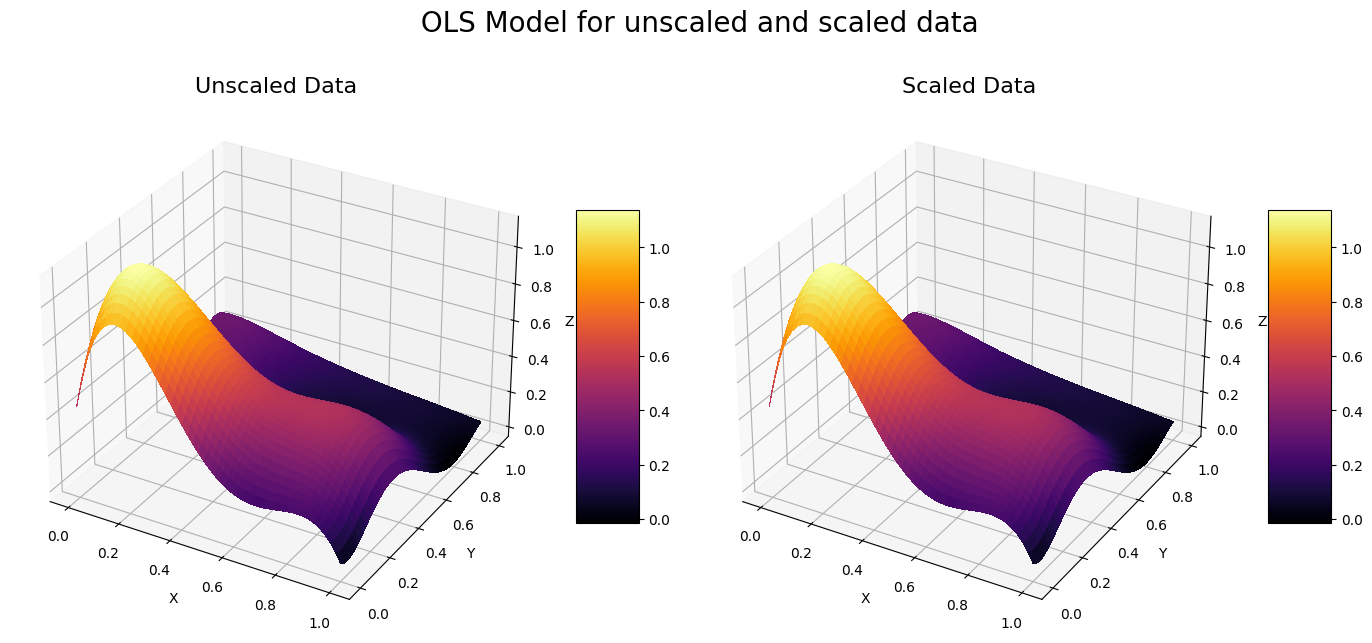

In [224]:
#Plot zmodel for scaled and unscaled data
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

fig.suptitle(' OLS Model for unscaled and scaled data', fontsize=20)  
# Plot unscaled data
ax1.set_zlim(np.min(z_mod), np.max(z_mod))
surf1 = ax1.plot_surface(xm, ym, z_mod.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Unscaled Data', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')  

# Plot scaled data
#unscale before plotting
z_mod_sc = scaler_z.inverse_transform(z_mod_sc.reshape(-1, 1)).flatten()
ax2.set_zlim(np.min(z_mod_sc), np.max(z_mod_sc))
surf2 = ax2.plot_surface(xm, ym, z_mod_sc.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Scaled Data', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')  
plt.tight_layout()
plt.show()

In [231]:
#Doing the same for Ridge regression
importlib.reload(fun)


nlambdas = 10
lambdas = np.logspace(-5, 1, nlambdas)

x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)

degrees = np.arange(1, 6)

mse_sc = np.zeros((nlambdas, len(degrees)+1,2))
mse_un = np.zeros((nlambdas, len(degrees)+1,2))
r2_sc = np.zeros((nlambdas, len(degrees)+1,2))
r2_un = np.zeros((nlambdas, len(degrees)+1,2))


for d in degrees:
    for i,lam in enumerate(lambdas):
        X = fun.X_design(x, y, d)
        z_flat = z.flatten()

        #unscaled data
        z_mod, z_mod_train, z_mod_test, beta, z_train, z_test = fun.Ridge(X, z_flat, lam, random_state=42)
        mse_un[i,d,0] = fun.MSE(z_mod_test, z_test)
        mse_un[i,d,1] = fun.MSE(z_mod_train, z_train)
        r2_un[i,d,0] = fun.R2(z_mod_test, z_test)
        r2_un[i,d,1] = fun.R2(z_mod_train, z_train)


        #scaled data
        z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X,scaler_z = fun.Ridge(X, z_flat, lam, random_state=42,scaled_data=True)
        mse_sc[i,d,0] = fun.MSE(z_mod_test_sc, z_test_sc)
        mse_sc[i,d,1] = fun.MSE(z_mod_train_sc, z_train_sc)
        r2_sc[i,d,0] = fun.R2(z_mod_test_sc, z_test_sc)
        r2_sc[i,d,1] = fun.R2(z_mod_train_sc, z_train_sc)

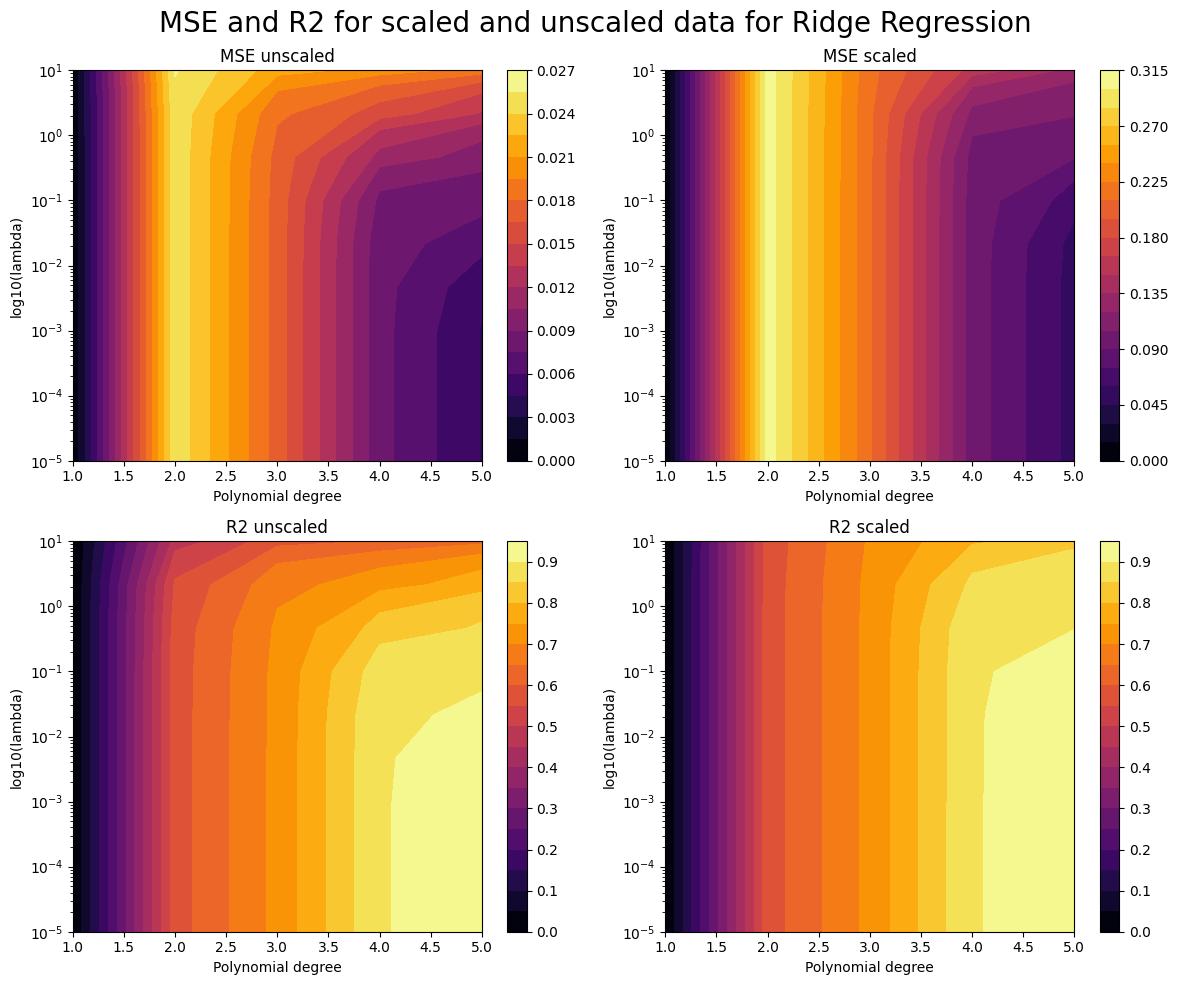

In [232]:
# Heatmap plot for MSE and R2 for scaled and unscaled data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled data for Ridge Regression',fontsize=20)

# Define degrees and lambdas for extent
degrees = np.arange(1, mse_un.shape[1])  # Degree axis (skipping extra index)
lambdas = np.logspace(-5, 1, nlambdas)  # Logarithmic lambda axis

# MSE unscaled
mappable0 = axs[0, 0].contourf(degrees, lambdas, mse_un[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable0, ax=axs[0, 0])
axs[0, 0].set_yscale('log')

# MSE scaled
mappable1 = axs[0, 1].contourf(degrees, lambdas, mse_sc[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable1, ax=axs[0, 1])
axs[0, 1].set_yscale('log')

# R2 unscaled
mappable2 = axs[1, 0].contourf(degrees, lambdas, r2_un[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')
axs[1, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable2, ax=axs[1, 0])
axs[1, 0].set_yscale('log')

# R2 scaled
mappable3 = axs[1, 1].contourf(degrees, lambdas, r2_sc[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable3, ax=axs[1, 1])
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


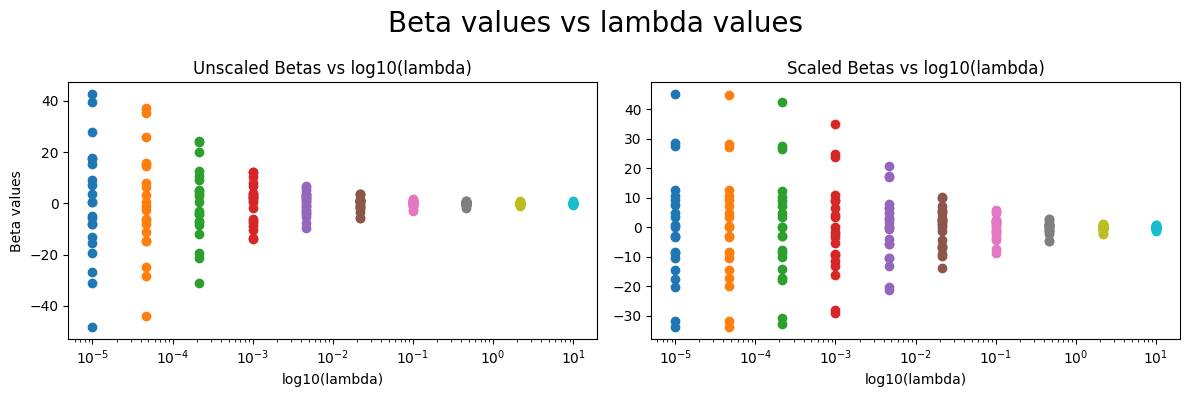

In [233]:
#the beta values for ridge regression
#We can also plot how beta values change with lambda for a given polynomial degree.
degree = 5
lambdas = np.logspace(-5, 1, nlambdas)

betas_sc = []
betas_un = []

for i,lam in enumerate(lambdas):
    X = fun.X_design(x, y, degree)
    z_flat = z.flatten()

    #unscaled data
    z_mod, z_mod_train, z_mod_test, beta, z_train, z_test = fun.Ridge(X, z_flat, lam, random_state=42)
    betas_un.append(beta)

    #scaled data
    z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X,scaler_z = fun.Ridge(X, z_flat, lam,random_state=42,scaled_data=True)
    betas_sc.append(beta_sc)

# Plot beta values for unscaled and scaled data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a 2x1 grid of subplots
fig.suptitle('Beta values vs lambda values',fontsize=20)

# Plot for unscaled betas
for i, betas in enumerate(betas_un):
    axs[0].scatter([lambdas[i]] * len(betas), betas)
axs[0].set_xlabel(r'log10(lambda)')
axs[0].set_ylabel(r'Beta values')
axs[0].set_title('Unscaled Betas vs log10(lambda)')
axs[0].set_xscale('log')
# axs[0].legend()


# Plot for scaled betas
for i, betas in enumerate(betas_sc):
    axs[1].scatter([lambdas[i]] * len(betas), betas)
axs[1].set_xlabel(r'log10(lambda)')
axs[1].set_title('Scaled Betas vs log10(lambda)')
axs[1].set_xscale('log') 
# axs[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()



<h1>Lasso Regression<h1>

In [234]:
#Doing the same for Lasso regression
importlib.reload(fun)


nlambdas = 10
lambdas = np.logspace(-5, 1, nlambdas)

x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)

degrees = np.arange(1, 6)

mse_sc = np.zeros((nlambdas, len(degrees)+1,2))
mse_un = np.zeros((nlambdas, len(degrees)+1,2))
r2_sc = np.zeros((nlambdas, len(degrees)+1,2))
r2_un = np.zeros((nlambdas, len(degrees)+1,2))


for d in degrees:
    for i,lam in enumerate(lambdas):
        X = fun.X_design(x, y, d)
        z_flat = z.flatten()

        #unscaled data
        z_mod, z_mod_train, z_mod_test, beta, z_train, z_test = fun.Lasso(X, z_flat, lam, random_state=42)
        mse_un[i,d,0] = fun.MSE(z_mod_test, z_test)
        mse_un[i,d,1] = fun.MSE(z_mod_train, z_train)
        r2_un[i,d,0] = fun.R2(z_mod_test, z_test)
        r2_un[i,d,1] = fun.R2(z_mod_train, z_train)


        #scaled data
        z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X,scaler_z = fun.Ridge(X, z_flat, lam,random_state=42,scaled_data=True)
        mse_sc[i,d,0] = fun.MSE(z_mod_test_sc, z_test_sc)
        mse_sc[i,d,1] = fun.MSE(z_mod_train_sc, z_train_sc)
        r2_sc[i,d,0] = fun.R2(z_mod_test_sc, z_test_sc)
        r2_sc[i,d,1] = fun.R2(z_mod_train_sc, z_train_sc)

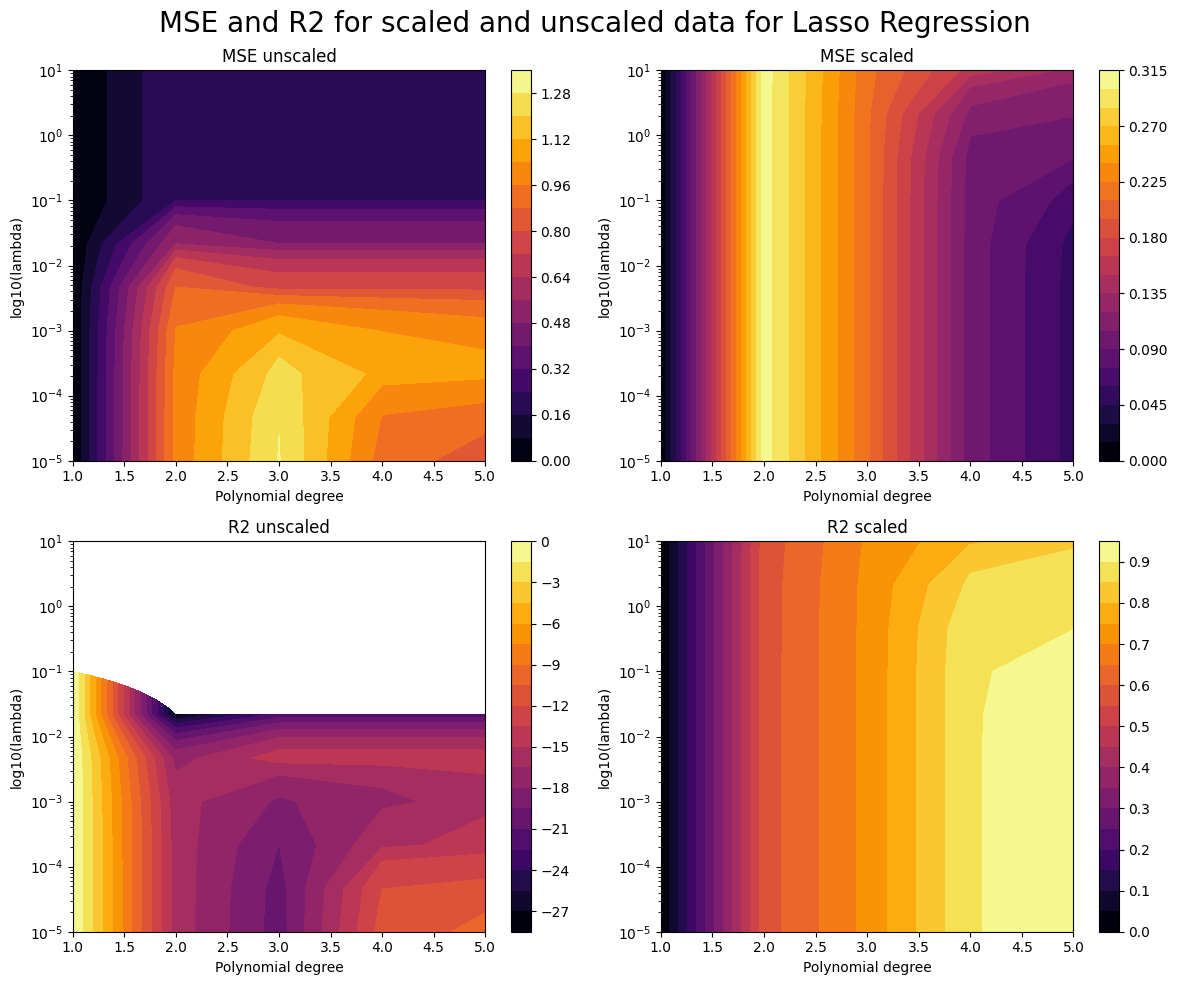

In [235]:
# Heatmap plot for MSE and R2 for scaled and unscaled data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled data for Lasso Regression',fontsize=20)

# Define degrees and lambdas for extent
degrees = np.arange(1, mse_un.shape[1])  # Degree axis (skipping extra index)
lambdas = np.logspace(-5, 1, nlambdas)  # Logarithmic lambda axis

# MSE unscaled
mappable0 = axs[0, 0].contourf(degrees, lambdas, mse_un[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable0, ax=axs[0, 0])
axs[0, 0].set_yscale('log')

# MSE scaled
mappable1 = axs[0, 1].contourf(degrees, lambdas, mse_sc[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable1, ax=axs[0, 1])
axs[0, 1].set_yscale('log')

# R2 unscaled
mappable2 = axs[1, 0].contourf(degrees, lambdas, r2_un[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')
axs[1, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable2, ax=axs[1, 0])
axs[1, 0].set_yscale('log')

# R2 scaled
mappable3 = axs[1, 1].contourf(degrees, lambdas, r2_sc[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable3, ax=axs[1, 1])
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


<h1>Bias-Variance tradeoff</h1>

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


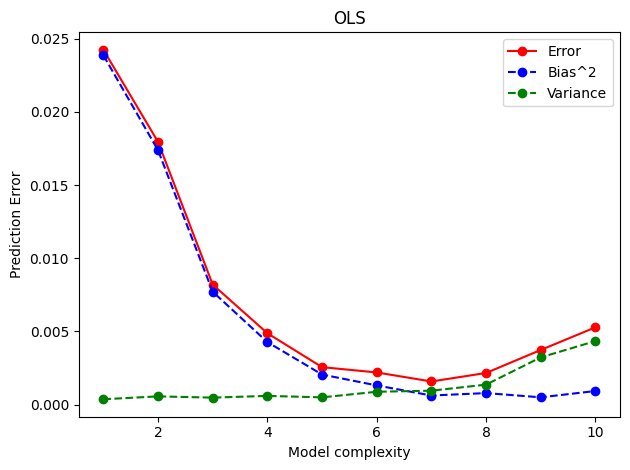

Degree of lowest error: 6
Lowest error: 0.0015891898805910777


In [306]:
importlib.reload(fun)
from tqdm import trange
from sklearn.utils import resample

n_boostraps = 200
maxdegree = 11
batch_size = 200


polydegree = np.zeros(maxdegree)
error = np.zeros_like(polydegree)
bias = np.zeros_like(polydegree)
variance = np.zeros_like(polydegree)

for degree in trange(1, maxdegree):
    X = fun.X_design(x, y, degree)
    polydegree[degree] = degree

    error[degree], bias[degree], variance[degree] = fun.bias_variance_tradeoff(X, z_flat, n_boostraps,batch_size)

plt.plot(polydegree[1:],error[1:], '-o',label='Error',color='red')
plt.plot(polydegree[1:], bias[1:],'--o', label='Bias^2',color='blue')
plt.plot(polydegree[1:], variance[1:],'--o', label='Variance',color='green')
plt.title('Bias-variance tradeoff')
plt.title('OLS')
plt.xlabel('Model complexity')
plt.ylabel('Prediction Error')
plt.legend()
plt.tight_layout()
plt.show()

#print degree of lowest error   
print('Degree of lowest error:',np.argmin(error[1:]))
print('Lowest error:',np.min(error[1:]))


<h1>Kfold</h1>

In [304]:

importlib.reload(fun)

k = np.arange(5, 11)

degrees = np.arange(5, 11)

mse = np.zeros((len(k), len(degrees), 3))

best_mse_ols, best_mse_ridge, best_mse_lasso = np.inf, np.inf, np.inf
best_k_ols, best_degree_ols = None, None
best_k_ridge, best_degree_ridge = None, None
best_k_lasso, best_degree_lasso = None, None

n,m = 0,0
for d in degrees:
    n = 0
    for i in k:
        X = fun.X_design(x, y, d)
        ols = fun.kfold('OLS', X, z_flat, i,)
       
        ridge = fun.kfold('Ridge', X, z_flat, i, scaling=True, lam = 1e-4)

        lasso = fun.kfold('Lasso', X, z_flat, i, scaling=True, lam = 1e-5)

        mse[n, m, 0] = ols
        mse[n, m, 1] = ridge
        mse[n, m, 2] = lasso

        if ols < best_mse_ols:
            best_mse_ols = ols
            best_k_ols = i
            best_degree_ols = d

        # Update best values for Ridge
        if ridge < best_mse_ridge:
            best_mse_ridge = ridge
            best_k_ridge = i
            best_degree_ridge = d

        # Update best values for Lasso
        if lasso < best_mse_lasso:
            best_mse_lasso = lasso
            best_k_lasso = i
            best_degree_lasso = d

        print(n,m)
        n+=1
    m += 1

# Print the best results
print(f"Best OLS: MSE = {best_mse_ols}, k = {best_k_ols}, degree = {best_degree_ols}")
print(f"Best Ridge: MSE = {best_mse_ridge}, k = {best_k_ridge}, degree = {best_degree_ridge}")
print(f"Best Lasso: MSE = {best_mse_lasso}, k = {best_k_lasso}, degree = {best_degree_lasso}")

0 0
1 0
2 0
3 0
4 0
5 0
0 1
1 1
2 1
3 1
4 1
5 1
0 2
1 2
2 2
3 2
4 2
5 2
0 3
1 3
2 3
3 3
4 3
5 3
0 4
1 4
2 4
3 4
4 4
5 4
0 5
1 5
2 5
3 5
4 5
5 5
Best OLS: MSE = 0.00010976007034407146, k = 6, degree = 10
Best Ridge: MSE = 0.007647740229462965, k = 10, degree = 10
Best Lasso: MSE = 0.030903043379156052, k = 7, degree = 10


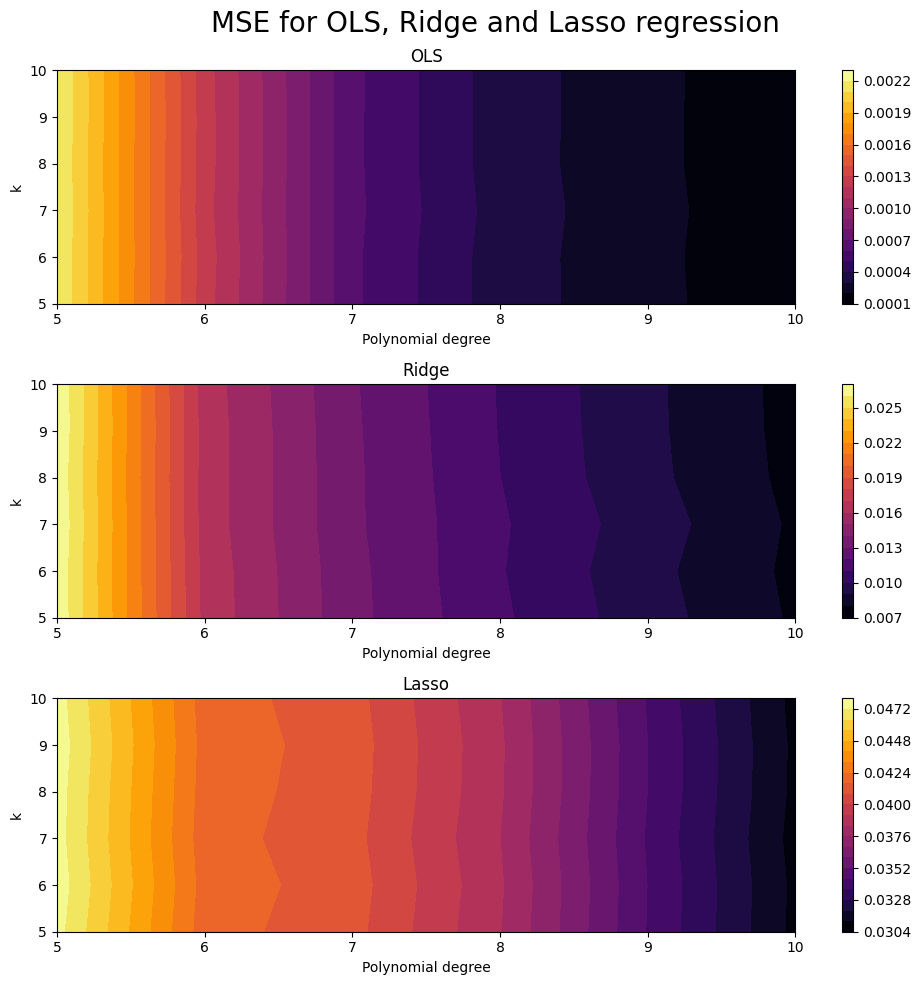

OLS
Best MSE: 0.00010976007034407146


IndexError: index 11 is out of bounds for axis 0 with size 6

In [302]:
#Heatmap plot for MSE for OLS, Ridge and Lasso regression
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('MSE for OLS, Ridge and Lasso regression',fontsize=20)

# Define degrees and k for extent
degrees = np.arange(5, 11)  # Degree axis
k = np.arange(5, 11)  # k axis

# OLS
mappable0 = axs[0].contourf(degrees, k, mse[:, :, 0], cmap='inferno', levels=20)
axs[0].set_title('OLS')
axs[0].set_xlabel('Polynomial degree')
axs[0].set_ylabel('k')
fig.colorbar(mappable0, ax=axs[0])

# Ridge
mappable1 = axs[1].contourf(degrees, k, mse[:, :, 1], cmap='inferno', levels=20)
axs[1].set_title('Ridge')
axs[1].set_xlabel('Polynomial degree')
axs[1].set_ylabel('k')
fig.colorbar(mappable1, ax=axs[1])

# Lasso
mappable2 = axs[2].contourf(degrees, k, mse[:, :, 2], cmap='inferno', levels=20)
axs[2].set_title('Lasso')
axs[2].set_xlabel('Polynomial degree')
axs[2].set_ylabel('k')
fig.colorbar(mappable2, ax=axs[2])

plt.tight_layout()
plt.show()


